In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pennylane as qml

In [2]:
qml.data.list_attributes(data_name="qchem")

['molname',
 'basis',
 'bondlength',
 'molecule',
 'hf_state',
 'hamiltonian',
 'sparse_hamiltonian',
 'meas_groupings',
 'fci_energy',
 'fci_spectrum',
 'dipole_op',
 'number_op',
 'spin2_op',
 'spinz_op',
 'symmetries',
 'paulix_ops',
 'optimal_sector',
 'tapered_hamiltonian',
 'tapered_hf_state',
 'tapered_dipole_op',
 'tapered_num_op',
 'tapered_spin2_op',
 'tapered_spinz_op',
 'vqe_gates',
 'vqe_params',
 'vqe_energy']

In [3]:
all_bond_lengths = ['0.5', '0.54', '0.58', '0.62', '0.66', '0.7', '0.74', '0.742', '0.78', '0.82', '0.86', '0.9', '0.94', '0.98', '1.02', '1.06', '1.1', '1.14', '1.18', '1.22', '1.26', '1.3', '1.34', '1.38', '1.42', '1.46', '1.5', '1.54', '1.58', '1.62', '1.66', '1.7', '1.74', '1.78', '1.82', '1.86', '1.9', '1.94', '1.98', '2.02', '2.06', '2.1']
#all_bond_lengths = np.sort(all_bond_lengths[::3] + ['0.742'])
#all_bond_lengths = ['0.9', '0.93', '0.96', '0.99', '1.02', '1.05', '1.08', '1.11', '1.14', '1.17', '1.2', '1.23', '1.26', '1.29', '1.32', '1.35', '1.38', '1.41', '1.44', '1.47', '1.5', '1.53', '1.56', '1.57', '1.59', '1.62', '1.65', '1.68', '1.71', '1.74', '1.77', '1.8', '1.83', '1.86', '1.89', '1.92', '1.95', '1.98', '2.01', '2.04', '2.07', '2.1']
#all_bond_lengths = np.sort(all_bond_lengths[::3] + ['1.57'])
#H2datasets = qml.data.load("qchem", molname="H6", basis="STO-3G", attributes=['vqe_energy', 'fci_energy'], bondlength=all_bond_lengths)
# print(len(H2datasets))
# print(H2datasets[0].molecule.coordinates)
# print(H2datasets[0].vqe_energy)
# print(H2datasets[0].sparse_hamiltonian)

vqe_energies = []
fci_energies = []
for bond_length in all_bond_lengths:
    data = qml.data.load("qchem", molname="H2", basis="STO-3G", attributes=['hamiltonian','vqe_energy', 'fci_energy'], bondlength=all_bond_lengths)[0]
    vqe_energies.append(data.vqe_energy)
    fci_energies.append(data.fci_energy)
    print(bond_length, fci_energies[-1])

BlockingIOError: [Errno 35] Unable to open file (unable to lock file, errno = 35, error message = 'Resource temporarily unavailable')

In [215]:
a = ['0.9', '0.93', '0.96', '0.99', '1.02', '1.05', '1.08', '1.11', '1.14', '1.17', '1.2', '1.23', '1.26', '1.29', '1.32', '1.35', '1.38', '1.41', '1.44', '1.47', '1.5', '1.53', '1.56', '1.57', '1.59', '1.62', '1.65', '1.68', '1.71', '1.74', '1.77', '1.8', '1.83', '1.86', '1.89', '1.92', '1.95', '1.98', '2.01', '2.04', '2.07', '2.1']
print(list(map(float,a)))

[0.9, 0.93, 0.96, 0.99, 1.02, 1.05, 1.08, 1.11, 1.14, 1.17, 1.2, 1.23, 1.26, 1.29, 1.32, 1.35, 1.38, 1.41, 1.44, 1.47, 1.5, 1.53, 1.56, 1.57, 1.59, 1.62, 1.65, 1.68, 1.71, 1.74, 1.77, 1.8, 1.83, 1.86, 1.89, 1.92, 1.95, 1.98, 2.01, 2.04, 2.07, 2.1]


In [205]:
data.hamiltonian

<Hamiltonian: terms=631, wires=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]>


In [203]:
len(data.hamiltonian.wires)

12

15


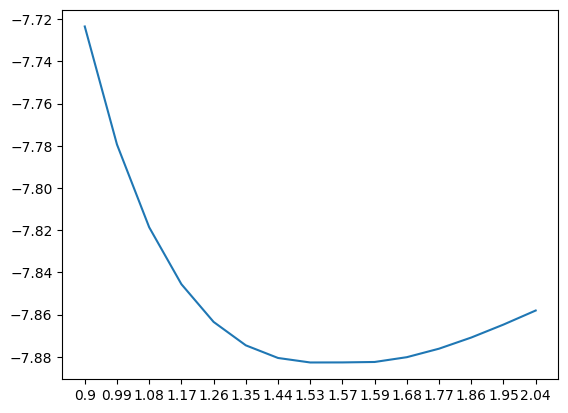

In [195]:
print(len(all_bond_lengths))
#plt.plot(all_bond_lengths,vqe_energies)
plt.plot(all_bond_lengths,fci_energies)

In [ ]:
all

In [122]:
def read_file(filename):
    record = pickle.load(open( filename, "rb" ))
    num_iters = len(record['H_list'])
    print(filename)
    print(num_iters)
    print(record['true_ge'])
    print('---')
    return record['vqe_error'][-1], record['ground_energy'][-1], record['true_ge']

results/H2_0.5_VQE_3.p
13
-1.0551607375072103
---
results/H2_0.62_VQE_3.p
2
-1.122767536167744
---


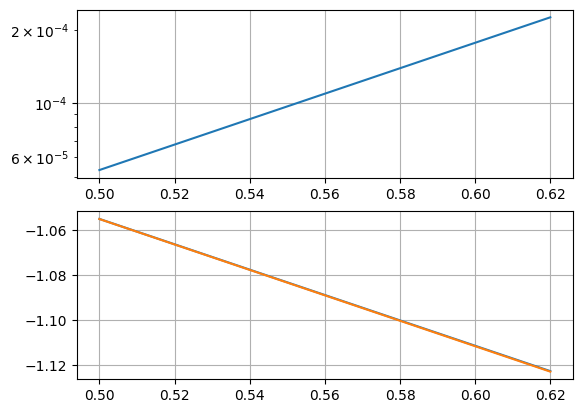

In [216]:
# H2: np.arange(0.44, 3, 0.15)
bond_length_lst = [0.5, 0.62]#np.arange(0.44, 3, 0.15)
filenames = ['results/H2_' + str(np.round(bond_length,2)) + '_VQE_3.p' for bond_length in bond_length_lst]
res = [read_file(f) for f in filenames]
vqe_error = [v[0] for v in res]
ge = np.array([v[1] for v in res])
true_ge = np.array([v[2] for v in res])

fig, axs = plt.subplots(2, 1)
axs[0].plot(bond_length_lst, vqe_error)
axs[1].plot(bond_length_lst, ge)
axs[1].plot(bond_length_lst, true_ge)
axs[0].set_yscale('log')
for ax in axs:
    ax.grid()

results/LiH_0.7_4_3_VQE_4.p
36
---
results/LiH_1.0_4_3_VQE_4.p
17
---
results/LiH_1.3_4_3_VQE_4.p
29
---
results/LiH_1.6_4_3_VQE_4.p
24
---
results/LiH_1.9_4_3_VQE_4.p
15
---
results/LiH_2.2_4_3_VQE_4.p
17
---
results/LiH_2.5_4_3_VQE_4.p
24
---
results/LiH_2.8_4_3_VQE_4.p
15
---
results/LiH_3.1_4_3_VQE_4.p
12
---


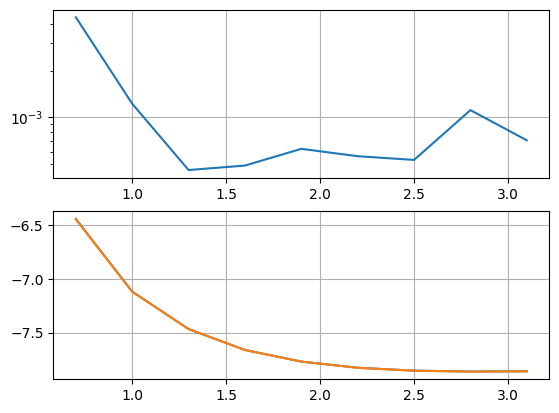

In [101]:
# LiH
bond_length_lst = np.arange(0.7, 3.2, 0.3)
filenames = ['results/LiH_' + str(np.round(bond_length,2)) + '_4_3_VQE_4.p' for bond_length in bond_length_lst]
res = [read_file(f) for f in filenames]
vqe_error = [v[0] for v in res]
ge = np.array([v[1] for v in res])
true_ge = np.array([v[2] for v in res])

fig, axs = plt.subplots(2, 1)
axs[0].plot(bond_length_lst, vqe_error)
axs[1].plot(bond_length_lst, ge)
axs[1].plot(bond_length_lst, true_ge)
axs[0].set_yscale('log')
for ax in axs:
    ax.grid()

In [31]:
np.arange(2.54, 3.0, 0.15)

array([2.54, 2.69, 2.84, 2.99])

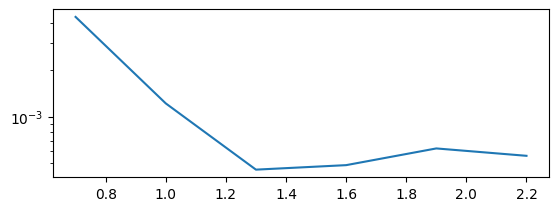

In [29]:
np.arange(0.7,4.8+0.01, 0.3)

array([0.7, 1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. , 4.3,
       4.6])